# Introduction

For a well and smooth function of the economy, it is essential to have a well-functioning loan market. It is the market where people can borrow money from financial institutions such as bank. The decision to offer loans is affected by the factors such as income of individual, credit score, and family dependence. Based on these factors, we would build a model that predicts Loan Eligibility for Dream Housing Finance company  based on the details of the clients
## Dataset:
Training data: https://drive.google.com/file/d/1tD02k2zKNUlVr9S-ncr-S_kYQNuSqZFV/view?usp=sharing

Test data : https://drive.google.com/file/d/1LzRJCXm0DzWIp99hP-RgQwrA5kRYdycZ/view?usp=sharing

## Step 1 : loading the dataset

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.simplefilter("ignore")

In [2]:
#importing files: train and test data
df_train = pd.read_csv(r'C:\Users\Rishabh Gupta\Downloads\loan_train.csv')
df_test =  pd.read_csv(r'C:\Users\Rishabh Gupta\Downloads\loan_test.csv')

In [3]:
print("train data has {} features and {} datapoints".format(df_train.shape[1],df_train.shape[0]))
print("test data has {} features and {} datapoints".format(df_test.shape[1],df_test.shape[0]))

train data has 15 features and 614 datapoints
test data has 12 features and 367 datapoints


In [4]:
#use of node interactivity of interactiveshell for having more than one output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [5]:
# look at the info of train and test data
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   New_Dependents     614 non-null    int64  
 5   Education          614 non-null    object 
 6   Self_Employed      582 non-null    object 
 7   ApplicantIncome    614 non-null    int64  
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         592 non-null    float64
 10  Loan_Amount_Term   600 non-null    float64
 11  Credit_History     564 non-null    float64
 12  Property_Area      614 non-null    object 
 13  Loan_Status        614 non-null    object 
 14  Average Income     614 non-null    int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 72.1+ KB
<class 'pandas.c

There are information about the loan of the clients : we have missing values for some of the columns.

Text(0.5, 1.0, 'Visualization of null values')

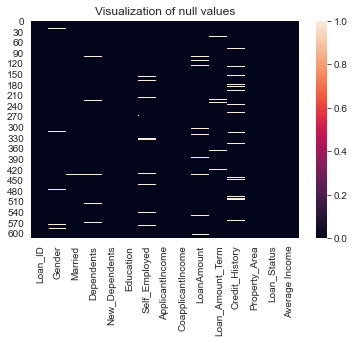

In [6]:
null = df_train.isna()
sns.heatmap(null)
plt.title("Visualization of null values")

In [7]:
round(df_train.isna().sum()*100/len(df_train),1)
round(df_test.isna().sum()*100/len(df_test),1)

Loan_ID              0.0
Gender               2.1
Married              0.5
Dependents           2.4
New_Dependents       0.0
Education            0.0
Self_Employed        5.2
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           3.6
Loan_Amount_Term     2.3
Credit_History       8.1
Property_Area        0.0
Loan_Status          0.0
Average Income       0.0
dtype: float64

Loan_ID              0.0
Gender               3.0
Married              0.0
Dependents           2.7
Education            0.0
Self_Employed        6.3
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           1.4
Loan_Amount_Term     1.6
Credit_History       7.9
Property_Area        0.0
dtype: float64

There is presence of null values in almost all columns. However, its quantity is very less (less than 5 percent). Maximum null values are present in self-employed and credit history

In [8]:
#looking at the first and last few rows of train set
df_train.head(5)
df_train.tail(5)

,Loan_ID,Gender,Married,Dependents,New_Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Average Income
0,LP001002,Male,No,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849
1,LP001003,Male,Yes,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2292
2,LP001005,Male,Yes,0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000
3,LP001006,Male,Yes,0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2583
4,LP001008,Male,No,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000


,Loan_ID,Gender,Married,Dependents,New_Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Average Income
609,LP002978,Female,No,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900
610,LP002979,Male,Yes,3+,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,821
611,LP002983,Male,Yes,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,4036
612,LP002984,Male,Yes,2,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,2528
613,LP002990,Female,No,0,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N,4583


In [9]:
#looking at the first and last few rows of test set
df_train.head(5)
df_test.tail(5)

,Loan_ID,Gender,Married,Dependents,New_Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Average Income
0,LP001002,Male,No,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849
1,LP001003,Male,Yes,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2292
2,LP001005,Male,Yes,0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000
3,LP001006,Male,Yes,0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2583
4,LP001008,Male,No,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


# Step 2 : Data Exploration

Data exploration is basically dealt with exploring data to deliver valuable insights about the information. It helps in knowing about different aspects of dataset: correlation, missing values and summary of each feature. So, we will cover this topic in this part.

In [10]:
# describe of features
# object features
df_train.describe(include='object')
# numerical feature
df_train.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002225,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


,New_Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Average Income
count,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,0.827362,5403.459283,1621.245798,146.412162,342.00000,0.842199,3797.749186
std,1.212833,6109.041673,2926.248369,85.587325,65.12041,0.364878,4295.927541
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,70.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,1725.750000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,2773.000000
75%,1.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,4327.750000
max,4.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,63337.000000


##### Look at some of the facts  from the above :


In [11]:
# Number of unique values : test and train data
# train data
df_train.nunique()
#test data
df_test.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
New_Dependents         4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
Average Income       522
dtype: int64

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [12]:
# looking at the unique values of each data
for x in  df_train.columns:
    if df_train[x].nunique() <5:
        print("the unique values of {} are {} ".format(x,pd.unique(df_train[x])))

the unique values of Gender are ['Male' 'Female' nan] 
the unique values of Married are ['No' 'Yes' nan] 
the unique values of Dependents are ['0' '1' '2' '3+' nan] 
the unique values of New_Dependents are [0 1 2 4] 
the unique values of Education are ['Graduate' 'Not Graduate'] 
the unique values of Self_Employed are ['No' 'Yes' nan] 
the unique values of Credit_History are [ 1.  0. nan] 
the unique values of Property_Area are ['Urban' 'Rural' 'Semiurban'] 
the unique values of Loan_Status are ['Y' 'N'] 


In [13]:
# look at the unique values of train data
for x in df_test.columns:
    if df_test[x].nunique()<12:
        print("The unique values of {} are {}".format(x,pd.unique(df_test[x])))

The unique values of Gender are ['Male' 'Female' nan]
The unique values of Married are ['Yes' 'No']
The unique values of Dependents are ['0' '1' '2' '3+' nan]
The unique values of Education are ['Graduate' 'Not Graduate']
The unique values of Self_Employed are ['No' 'Yes' nan]
The unique values of Credit_History are [ 1. nan  0.]
The unique values of Property_Area are ['Urban' 'Semiurban' 'Rural']


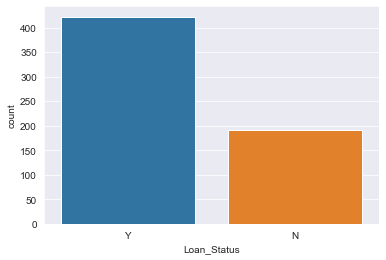

In [14]:
# look at the distribution of loan_status : percentage 
sns.countplot(df_train['Loan_Status'])

From the above, we can see that the individuals who got loans are more than twice of those who were refused it. As a result, we may not learn that well due to unbalanced dataset. let's use resample technique to bring both of them into a balanced situation. The resample uses knn technique to create new samples for the minority class.

Since the data is already low, it would be betterto raise the size of minority class.

In [15]:
# min and majority dataframe
df_min = df_train[df_train['Loan_Status'] =='N']
df_maj  = df_train[df_train['Loan_Status'] =='Y']
# using resample method of utils
from sklearn.utils import resample
# upsample the df_min to the size of majority class
df_min = resample(df_min,n_samples=422)
# concattting them
df_train = pd.concat([df_min,df_maj])

In [16]:
# loan at the loan status now
df_train['Loan_Status'].describe()

count     844
unique      2
top         N
freq      422
Name: Loan_Status, dtype: object

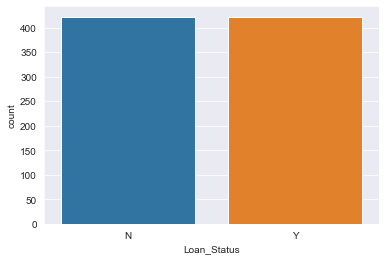

In [17]:
# visualization
sns.countplot(df_train['Loan_Status'])

Now, thanks to upsampling we have equal number of sets for both type of loan_status.

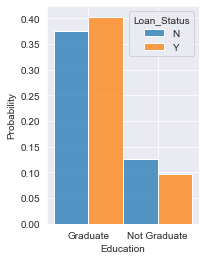

In [18]:
# countplot
plt.subplot(1,2,1)
#sns.countplot(df_train['Loan_Status'],hue=df_train['Education'],es)
#plt.subplot(1,2,2)
#sns.countplot(df_train['Self_Employed'],hue=df_train['Loan_Status'])
# https://github.com/mwaskom/seaborn/issues/1027 
# percentage way
# https://seaborn.pydata.org/generated/seaborn.barplot.html
#sns.histplot(x = 'Loan_Status',data=df_train,stat='probability')
sns.histplot(x='Education',data=df_train,stat='probability',hue='Loan_Status',multiple='dodge')

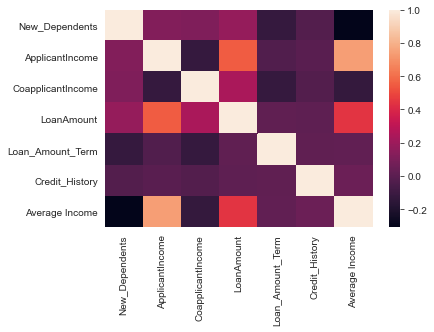

In [19]:
# look at the correlation 
cor = df_train.corr()
sns.heatmap(cor)

Correlation among numerical variables seems to be negligible. At max, there is a postive correlation of 0.57 between applicant income and loan_amount. This is quite obvious as people with higher income tend to apply for higher loan amount.

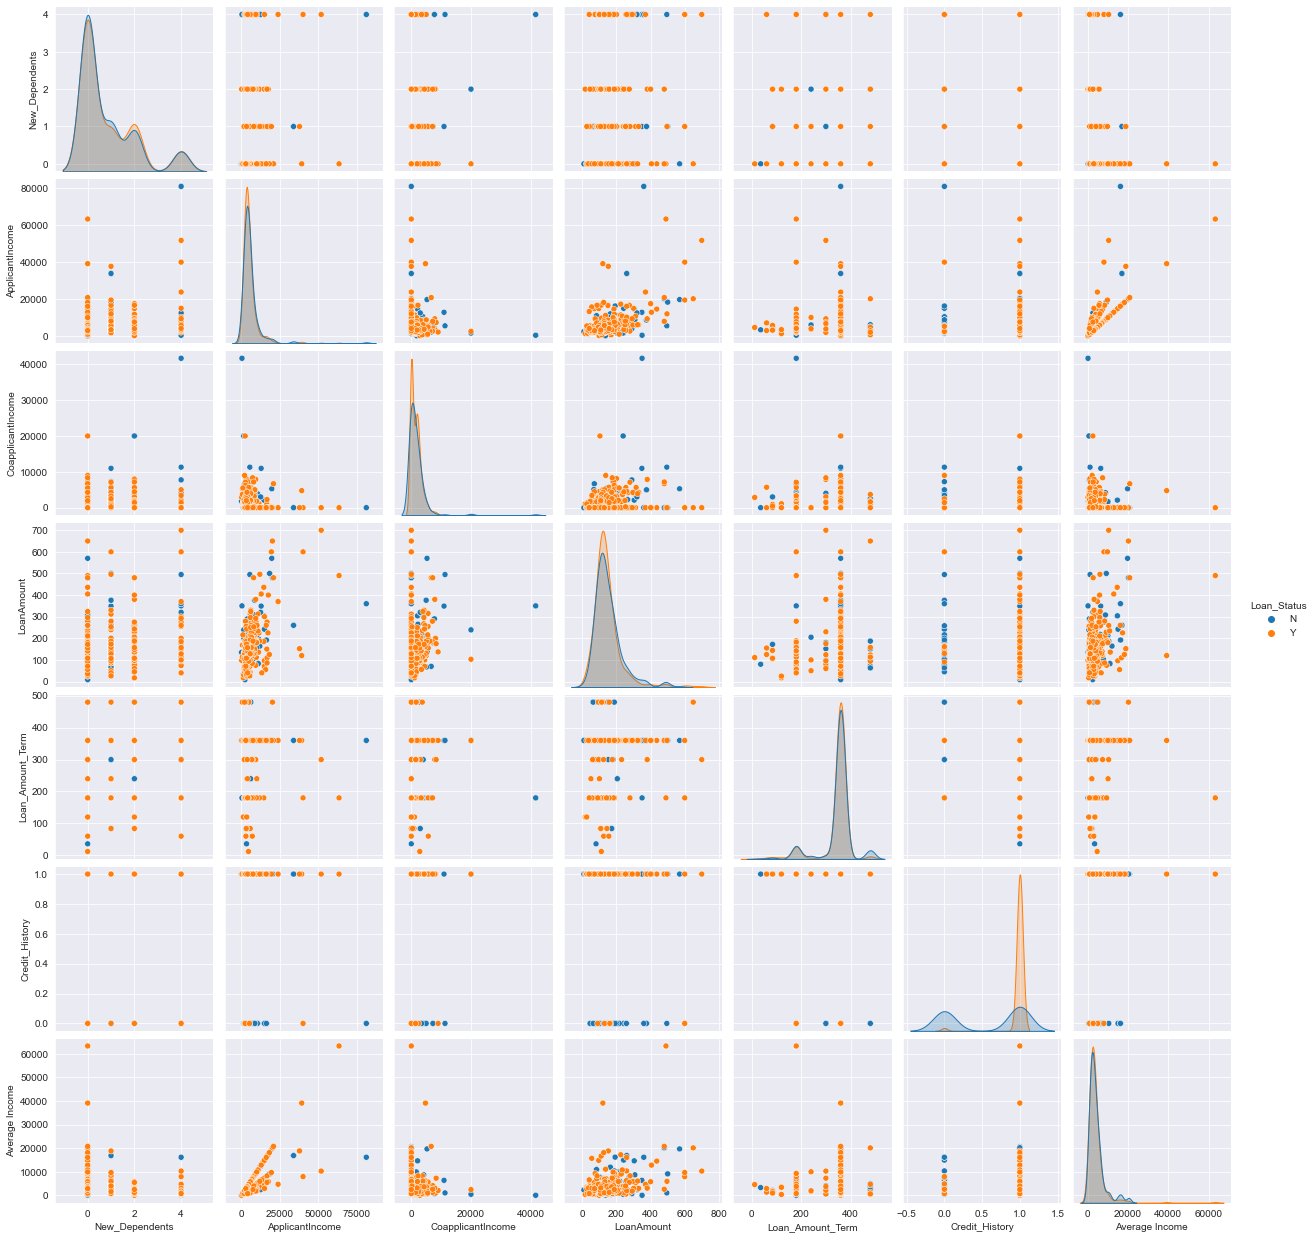

In [20]:
# pairplot to look at the link between any two numerical variables
sns.pairplot(df_train,hue='Loan_Status')

There appears to lack of correlation between variables.
If you look at the credit history , you will find out that largely people with credit history of 1 are given loans(compared to credit history of 0). Also, there are some other insights as well.

1. People are 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B8E501280>,
      dtype=object)

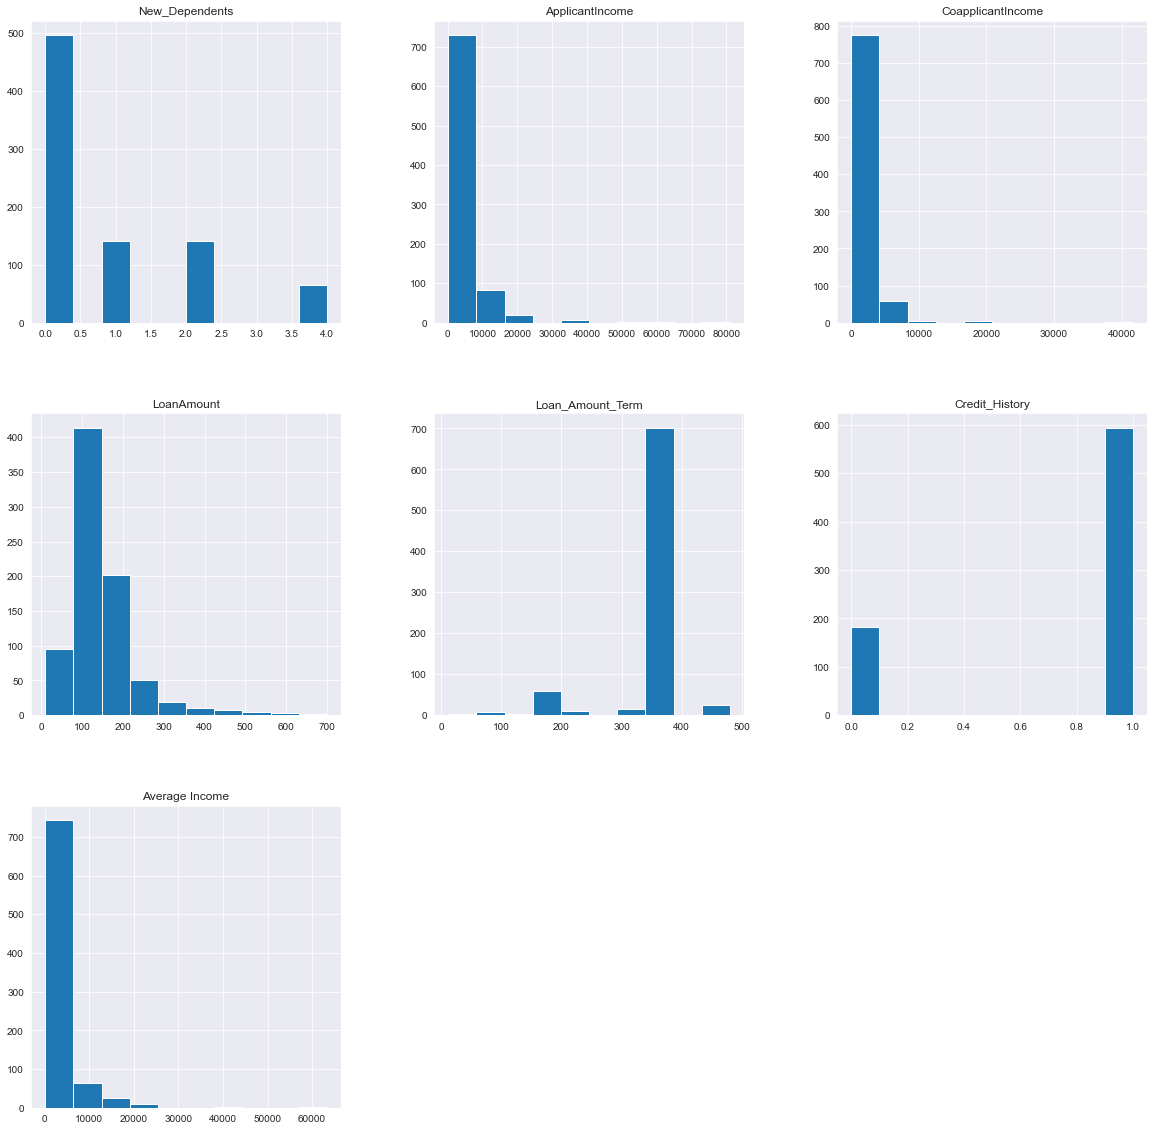

In [21]:
# distribution of loan_amount
#plt.figure(figsize=(40,40))
df_train.hist(figsize=(20,20))

1. Loan_Amount_terms seems to be mostly around 365 days( 1 year).

2. Applicant income lies below 10000 while co-applicant income is around 5000.

3. Credit history of most applicant is 1(good). As a result most of the individuals are getting loans.

# Step 3:  Data Cleaning and data preparation

In this step, we will work on cleaning data and prepare it for modelling purpose. Basically, we would drop or fillna the missing values, convert the non-numerica data into numeric one ( for model) and then, we will split the dataset into train and validation oness.

#### Data Cleaning

Now, we will clean the missing values. Since there are quite less dataset, it won't be wise to rule the missing values out. So, we will fill them with either median or mode value.

In [22]:

df_train.isnull().sum()
df_test.isnull().sum()

Loan_ID               0
Gender               23
Married               3
Dependents           20
New_Dependents        0
Education             0
Self_Employed        44
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           36
Loan_Amount_Term     19
Credit_History       67
Property_Area         0
Loan_Status           0
Average Income        0
dtype: int64

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [23]:
# train_data
# filling the numerics ones with the median
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(),inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['LoanAmount'].median(),inplace=True)

In [24]:
# train data
#filling the string ones with mode
df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0],inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0],inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace=True)

# test data
# filling the string ones with mode
df_test['Gender'].fillna(df_test['Gender'].mode()[0],inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0],inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0],inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0],inplace=True)



In [25]:
# look at the train and test: there are no null values
df_train.isnull().sum()
#  test data
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
New_Dependents       0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Average Income       0
dtype: int64

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

The loan_ID variable lacks relevance in prediction because it is an automated increment variable having no link in decision to loan.

In [26]:
# dropping it from train and test
df_train.drop('Loan_ID',axis=1,inplace=True)
df_test.drop('Loan_ID',axis=1,inplace=True)


In [27]:
# dropping new_Dependent as it is the same as the dependent one
df_train.drop('New_Dependents',inplace=True,axis=1)

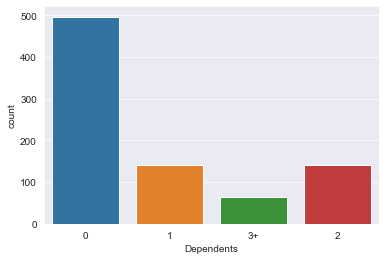

In [28]:
# look at the dependent variable
sns.countplot(df_train['Dependents'])


Dependents variable has 3+ which makes it an object. Since it is a numerical ordinal variable , we will make it 4 for better use

In [29]:
# using replace method to do so
# train data
df_train['Dependents'] = df_train['Dependents'].replace('3+',4)
# for test data
df_test['Dependents'] = df_test['Dependents'].replace('3+',4)


In [30]:
# converting it into numeric : as it is numbers are in string form
df_train['Dependents'] =pd.to_numeric(df_train['Dependents'])
df_test['Dependents'] = pd.to_numeric(df_test['Dependents'])

In [31]:
 # mapping the loan_status variable
df_train['Loan_Status'].map({'Y':1,'N':0})

568    0
254    0
358    0
268    0
399    0
      ..
608    1
609    1
610    1
611    1
612    1
Name: Loan_Status, Length: 844, dtype: int64

In [32]:
 # getting dummies of categorical variables
# train data
df_tr =  pd.get_dummies(df_train,drop_first=True)
# test data
df_te = pd.get_dummies(df_test,drop_first=True)

In [33]:
# look at train data
df_tr.head(5)
# look at test data
df_te.head(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Average Income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
568,0,2378,0.0,9.0,360.0,1.0,2378,0,0,0,0,0,1,0
254,0,16250,0.0,192.0,360.0,0.0,16250,1,0,0,1,0,1,0
358,0,3000,1666.0,100.0,480.0,0.0,3000,1,1,1,0,0,1,0
268,0,3418,0.0,135.0,360.0,1.0,3418,0,0,0,0,0,0,0
399,0,1500,1800.0,103.0,360.0,0.0,1500,0,0,0,0,1,0,0


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
3,2,2340,2546,100.0,360.0,1.0,1,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1


In [34]:
# dividing into x and y variable
x= df_tr.drop('Loan_Status_Y',axis=1)
y = df_tr['Loan_Status_Y']
# convert into arrays
x_a  = np.array(x)
y_a = np.array(y)

In [35]:
# Splitting the data set:
# Now we will split the dataset into train and test data: 
# using train_test_split of model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,stratify=y_a,random_state=34,test_size=0.20)

#### Normalize the features
Now, we will normalize the features so that they lie in the same range. This is done with a view to standardize the variables and standardization makes features equally important. Here, we would be using minmaxscaler which will make to convert each feature into (0,1) range.

In [36]:
# col is the variable with all columns names
col = df_train.columns[::]
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# initializing it
mm = MinMaxScaler()
# transform both x_a 
x_a = mm.fit_transform(x_a)

## Step 3 : Data Modelling

In this step , we will build a simple baseline model which should be good enough to predict loan status. It is a classification problem for which we will make use different classification algorithms and choose the model which works best for us in terms of prediction.


We would be using cross_validation on the train data by which a significant portion of it would be used for testing. Then once we arrive at the best model, we would be using the same on the test data to see how good it works on the test data.

In [37]:
# import all available classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# dictionary of models
models = {'Logistic Regression':LogisticRegression(),'SVC':SVC(),'DecisionTreeClassifier':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier()}
# list of scores from cross val score 
scores_mean = []
scores_var = []
for model in models.values():
    scores_mean.append(np.mean(cross_val_score(model,x_train,y_train,cv=5)))
    scores_var.append(np.std(cross_val_score(model,x_train,y_train,cv=5)))
for i in range(len(models.keys())):
    print("The average accuracy and average variation error of {} are {} and {} respectively".format(list(models.keys())[i],round(scores_mean[i]*100,0),round(scores_var[i]*100,0)))

The average accuracy and average variation error of Logistic Regression are 70.0 and 2.0 respectively
The average accuracy and average variation error of SVC are 53.0 and 2.0 respectively
The average accuracy and average variation error of DecisionTreeClassifier are 83.0 and 3.0 respectively
The average accuracy and average variation error of RandomForestClassifier are 87.0 and 3.0 respectively


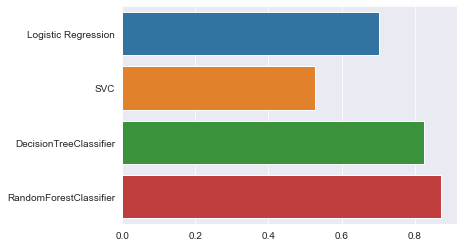

In [38]:
# visualization to see the performance by each model
sns.barplot(x=scores_mean,y=list(models.keys()))

From the above, we can say that the RandomForest is best in terms of prediction. So,we will take this model ahead and look at its performance for the test data.

In [39]:
# initialize both models
model = RandomForestClassifier()
# fitting or learning with train data
model.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
# predict on test data
y_pred = model.predict(x_test)
# look at the clasficiation report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        84
           1       0.90      0.89      0.90        85

    accuracy                           0.90       169
   macro avg       0.90      0.90      0.90       169
weighted avg       0.90      0.90      0.90       169



In [41]:
# look at score of prediction
print("The accuracy of the Random Forest is {}".format(model.score(x_test,y_test)))

The accuracy of the Random Forest is 0.8994082840236687


We are able to extract a good amount of prediction. This is because model is equally good in predicting for 0 and 1 loan status. In addition, the prediction on test data is even  greater than the prediction received on cross_validation (92 compared to 89). Thus, it looks like this model is not having an overfitting problem and it seems that it has a good learning experience with randomforest model.

## Step 4: Feature Selection and Feature engineering

In this step , we will employ techniques such as feature engineering and hyperparameter to enhance the overall performance of the model.

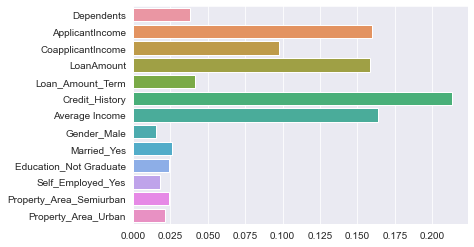

In [42]:
# feature importance : coef_ attribute of the model
sns.barplot(x=np.array(model.feature_importances_).flatten(),y=np.array(x.columns).flatten())

The variables like credit history,income , loan_amount, coapplicant income have good contributions to prediction. Out of all, the credit history seems to playing the major role in determining loan_status.


Now, we will create new features of the given ones. This will basically concerned with creating new featurs from combining two or more or creating discrete variables of continuous variables such as loan amount and income.

In [43]:
# family income which is income divide by number of dependents
x['Family_income'] = round(x['Average Income'] /(1+x['Dependents']))
# sum of co-applicant income and applicant income
x['total_income']  = x['ApplicantIncome'] + x['CoapplicantIncome']

In [44]:
x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Average Income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Family_income,total_income
568,0,2378,0.0,9.0,360.0,1.0,2378,0,0,0,0,0,1,2378.0,2378.0
254,0,16250,0.0,192.0,360.0,0.0,16250,1,0,0,1,0,1,16250.0,16250.0
358,0,3000,1666.0,100.0,480.0,0.0,3000,1,1,1,0,0,1,3000.0,4666.0
268,0,3418,0.0,135.0,360.0,1.0,3418,0,0,0,0,0,0,3418.0,3418.0
399,0,1500,1800.0,103.0,360.0,0.0,1500,0,0,0,0,1,0,1500.0,3300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,3232,1950.0,108.0,360.0,1.0,3232,1,1,0,0,0,0,3232.0,5182.0
609,0,2900,0.0,71.0,360.0,1.0,2900,0,0,0,0,0,0,2900.0,2900.0
610,4,4106,0.0,40.0,180.0,1.0,821,1,1,0,0,0,0,164.0,4106.0
611,1,8072,240.0,253.0,360.0,1.0,4036,1,1,0,0,0,1,2018.0,8312.0


In [45]:
# convert into arrays
x_a  = np.array(x)
y_a = np.array(y)

In [46]:
# col is the variable with all columns names
col = df_train.columns[::]
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# initializing it
mm = MinMaxScaler()
# transform both x_a 
x_a = mm.fit_transform(x_a)

In [47]:
# Splitting the data set:
# Now we will split the dataset into train and test data: 
# using train_test_split of model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,random_state=34,test_size=0.20)

In [48]:
# initialize both models
model = RandomForestClassifier()
# fitting or learning with train data
model.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
# predict on test data
y_pred = model.predict(x_test)
# look at the clasficiation report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        82
           1       0.91      0.85      0.88        87

    accuracy                           0.88       169
   macro avg       0.88      0.88      0.88       169
weighted avg       0.88      0.88      0.88       169



In [50]:
# look at score of prediction
print("The accuracy of the random forest model is {}".format(model.score(x_test,y_test)))

The accuracy of the random forest model is 0.8816568047337278


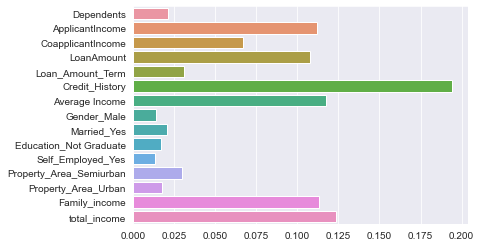

In [51]:
# loook at the feature importances_
sns.barplot(model.feature_importances_,x.columns)

Lets hypertune the parameters of the randomforestmodel and see how it impacts the model prediction and other prediction metrics(such as recall and f1).

### using gridsearch cv for it
from sklearn.model_selection import GridSearchCV
### setting parameters
### max_features: number of max featurs that can be used for each individual tree
### min_samples_split is the min samples required for a split in a tree
### n_estimators are the number of individuals trees to be used
### max_depth is the number of levels (from root to leaf)
para  = {'max_features':['auto','sqrt'],'max_depth':[10,30,50,70,90,100],
                                    'min_samples_split' :[5,10,15],'min_samples_leaf' :[1,2,4],'bootstrap':[True,False]
,'n_estimators':[int(x) for x in np.linspace(100,1000,100) ]}

### using gridsearch feature
gs = GridSearchCV(param_grid=para,estimator=RandomForestClassifier())
### fitting on x_train and y_train
gs.fit(x_train,y_train)

Lets remove some features  which has no contribution to the model prediction:

These are dependents , gender_male,married_yes, education_not , self_employed_yes, property_Area_semiurban, property_area_urban as welll.

In [52]:
# creating x_fil for this
x_fil = x.drop(['Dependents','Gender_Male','Married_Yes','Education_Not Graduate','Self_Employed_Yes',
               'Property_Area_Urban','Property_Area_Semiurban'],axis=1)

In [53]:
# creating arrays
# convert into arrays
x_a  = np.array(x_fil)
y_a = np.array(y)

In [54]:
# col is the variable with all columns names
col = df_train.columns[::]
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# initializing it
mm = MinMaxScaler()
# transform both x_a 
x_a = mm.fit_transform(x_a)

In [55]:
# Splitting the data set:
# Now we will split the dataset into train and test data: 
# using train_test_split of model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,random_state=34,test_size=0.20)

In [56]:
# initialize both models
model = RandomForestClassifier()
# fitting or learning with train data
model.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
# predict on test data
y_pred = model.predict(x_test)
# look at the clasficiation report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        82
           1       0.91      0.86      0.89        87

    accuracy                           0.89       169
   macro avg       0.89      0.89      0.89       169
weighted avg       0.89      0.89      0.89       169



In [58]:
# look at score of prediction
print("The accuracy of the random forest model is {}".format(model.score(x_test,y_test)))

The accuracy of the random forest model is 0.8875739644970414


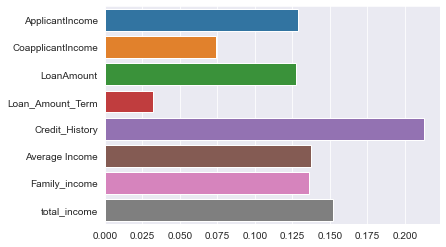

In [60]:
# feature importance


sns.barplot(np.array(model.feature_importances_).flatten(),np.array(x_fil.columns).flatten())

array([[0.0275572 , 0.        , 0.        , ..., 0.03648031, 0.0372868 ,
        0.011765  ],
       [0.1991342 , 0.        , 0.26483357, ..., 0.25574154, 0.2563645 ,
        0.18612836],
       [0.03525046, 0.03998368, 0.1316932 , ..., 0.04631166, 0.04710992,
        0.04052389],
       ...,
       [0.04893012, 0.        , 0.04486252, ..., 0.01187033, 0.00232154,
        0.033485  ],
       [0.09798392, 0.00575995, 0.35311143, ..., 0.06268671, 0.03160139,
        0.0863521 ],
       [0.09193568, 0.        , 0.25759768, ..., 0.03885122, 0.01304485,
        0.07718897]])

Now,we will convert the above continous variables into discrete ones to see how it changes prediction.
We will use [qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) method to do this as it is based on quartiles and will allow the equal number of elements in each bin.

In [162]:
# implementing qcut method of pandas
x['Applicant_Income_order']  = pd.cut(x['ApplicantIncome'],bins=4,labels =[1,2,3,4] )
x['CoapplicantIncome_order'] = pd.cut(x['CoapplicantIncome'],bins=4,labels =[1,2,3,4],duplicates ='drop' )
x['Loan_Amount_order'] = pd.cut(x['LoanAmount'],bins=4,labels =[1,2,3,4] )
x['Loan_term_order'] = pd.cut(x['Loan_Amount_Term'],bins=4,labels =[1,2,3,4] )
x['Family_Income_order']  = pd.cut(x['Family_income'],bins=4,labels =[1,2,3,4] )
x['total_income_order'] = pd.cut(x['total_income'],bins=4,labels =[1,2,3,4] )
x['Loan_Amount_per_term_order'] = pd.cut(x['Loan_Amount_per_term'],bins=4,labels =[1,2,3,4] )

In [163]:
# convert into arrays
x_a  = np.array(x)
y_a = np.array(y)

In [164]:
# col is the variable with all columns names
col = df_train.columns[::]
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# initializing it
mm = MinMaxScaler()
# transform both x_a 
x_a = mm.fit_transform(x_a)

In [165]:
# Splitting the data set:
# Now we will split the dataset into train and test data: 
# using train_test_split of model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,stratify=y_a,random_state=34,test_size=0.20)

In [168]:
# initialize both models
model = RandomForestClassifier()
# fitting or learning with train data
model.fit(x_train,y_train)

RandomForestClassifier()

In [169]:
# predict on test data
y_pred = model.predict(x_test)
# look at the clasficiation report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        84
           1       0.90      0.91      0.90        85

    accuracy                           0.90       169
   macro avg       0.90      0.90      0.90       169
weighted avg       0.90      0.90      0.90       169



In [170]:
# look at score of prediction
print("The accuracy of the logistic regression model is {}".format(model.score(x_test,y_test)))

The accuracy of the logistic regression model is 0.8994082840236687


In [171]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Average Income
20,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N,7660
225,Male,Yes,0,Graduate,No,3250,0.0,170.0,360.0,1.0,Rural,N,3250
423,Male,Yes,1,Graduate,No,7250,1667.0,110.0,128.0,0.0,Urban,N,3625
338,Female,No,4,Not Graduate,No,1830,0.0,128.0,360.0,0.0,Urban,N,366
553,Male,Yes,0,Not Graduate,No,2454,2333.0,181.0,360.0,0.0,Urban,N,2454
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,3232
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900
610,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,821
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,4036


Look at the above, we can see some features are not having much role in model work. Let's see how it's work when we remove some of them.


1. Removing some variables

2. Hypertunings

3. look at the resample method

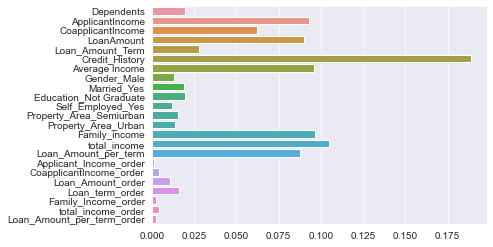

In [172]:
# feature importance


sns.barplot(np.array(model.feature_importances_).flatten(),np.array(x.columns).flatten())

There are some features that are contributing quite less to the model. So, we would remove them to build a simplier model and then, see how the model performance changes in response to it.

In [59]:
# dropping dependents, applicant income, gender_make,self-employed, property urban, total income, 
# total incoome order 
x_fil  =  x.drop(['Dependents','ApplicantIncome','Gender_Male','Self_Employed_Yes','Property_Area_Urban','total_income','total_income_order'],axis=1)

In [60]:
# convert into arrays
x_a  = np.array(x_fil)
y_a = np.array(y)

In [61]:
# col is the variable with all columns names
col = df_train.columns[::]
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# initializing it
mm = MinMaxScaler()
# transform both x_a 
x_a = mm.fit_transform(x_a)

In [62]:
# Splitting the data set:
# Now we will split the dataset into train and test data: 
# using train_test_split of model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,stratify=y_a,random_state=34,test_size=0.20)

In [63]:
# initialize both models
model = LogisticRegression()
# fitting or learning with train data
model.fit(x_train,y_train)

LogisticRegression()

In [64]:
# predict on test data
y_pred = model.predict(x_test)
# look at the clasficiation report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71        84
           1       0.70      0.89      0.78        85

    accuracy                           0.75       169
   macro avg       0.77      0.75      0.75       169
weighted avg       0.77      0.75      0.75       169



In [65]:
# look at score of prediction
print("The accuracy of the logistic regression model is {}".format(model.score(x_test,y_test)))

The accuracy of the logistic regression model is 0.7514792899408284


Thus, the model performance has improved a lot with the removal of some less important features.

### Hypertuning parameters
Now,we will tune the parameters of the logistic regression to see how its performance would be impacted.
We will make use of grid search cv for implementing this.

In [66]:
from sklearn.model_selection import GridSearchCV
# getting the set of parameters to be used
para = {'penalty':['L1','L2','none','elasticnet'],'C' : [0.1,0.01,1,10],'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
 # using the Gridsearch
gr = GridSearchCV(estimator =LogisticRegression(),param_grid=para)    
# fitting it
gr.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.01, 1, 10],
                         'penalty': ['L1', 'L2', 'none', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [67]:
# finding the best paramater values
gr.best_params_

{'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}

In [68]:
# now let us see how the model performs on this parameters
# initialize the model with these parameters
lr = LogisticRegression(C=0.1,penalty='none',solver='newton-cg')
# fitting on trrain data
lr.fit(x_train,y_train)

LogisticRegression(C=0.1, penalty='none', solver='newton-cg')

In [69]:
# predict on test data
y_pred = lr.predict(x_test)
# look at the clasficiation report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        84
           1       0.70      0.87      0.78        85

    accuracy                           0.75       169
   macro avg       0.77      0.75      0.75       169
weighted avg       0.77      0.75      0.75       169



In [70]:
# look at score of prediction
print("The accuracy of the logistic regression model is {}".format(model.score(x_test,y_test)))

The accuracy of the logistic regression model is 0.7514792899408284


Text(0.5, 1.0, 'Feature Importance of features')

Text(0, 0.5, 'Features')

Text(0.5, 0, 'Importance measured by the coefficient')

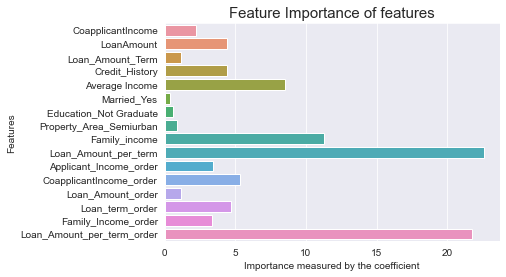

In [79]:
# plotting featture importance to see
#how mmodel performance changes with reductoon of some more features
sns.barplot(y=x_fil.columns,x=np.array(abs(lr.coef_)).flatten())
plt.title("Feature Importance of features",fontsize=15)
plt.ylabel("Features")
plt.xlabel("Importance measured by the coefficient")

Lets remove some more features and simplify the model again as well.

From the above, one can see that features like married, education, property_area,  loan_amount_terms, 
loan_amount_order are having less impact. So,we would remove them and then see the model prediction.


In [94]:
# removing fetures
x_fil2 = x_fil.drop(['Married_Yes','Loan_Amount_Term','Married_Yes','Education_Not Graduate','Property_Area_Semiurban',
            'Loan_Amount_order'],axis=1)

In [95]:
# convert into arrays
x_a  = np.array(x_fil2)
y_a = np.array(y)

In [96]:
# col is the variable with all columns names
col = df_train.columns[::]
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# initializing it
mm = MinMaxScaler()
# transform both x_a 
x_a = mm.fit_transform(x_a)

In [97]:
# Splitting the data set:
# Now we will split the dataset into train and test data: 
# using train_test_split of model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,stratify=y_a,random_state=34,test_size=0.20)

In [98]:
# initialize both models
model = LogisticRegression(C=0.1,penalty='none',solver='newton-cg')
# fitting or learning with train data
model.fit(x_train,y_train)

LogisticRegression(C=0.1, penalty='none', solver='newton-cg')

In [99]:
# predict on test data
y_pred = model.predict(x_test)
# look at the clasficiation report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.64      0.73        84
           1       0.72      0.89      0.80        85

    accuracy                           0.77       169
   macro avg       0.79      0.77      0.77       169
weighted avg       0.79      0.77      0.77       169



In [100]:
# look at score of prediction
print("The accuracy of the logistic regression model is {}".format(model.score(x_test,y_test)))

The accuracy of the logistic regression model is 0.7692307692307693
